In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm, linregress

In [31]:
def norm_interval(thetahat, se, alpha = 0.05):
    return (thetahat + norm.ppf(alpha / 2) * se, thetahat + norm.ppf(1 - alpha / 2) * se)

def pivot_interval(thetahat, thetaboot, alpha = 0.05):
    return (2 * thetahat - np.quantile(thetaboot, 1 - alpha / 2), 2 * thetahat - np.quantile(thetaboot, alpha / 2))

def percentile_interval(thetaboot, alpha = 0.05):
    return (np.quantile(thetaboot, alpha / 2), np.quantile(thetaboot, 1 - alpha / 2))



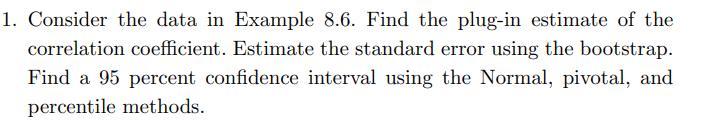

In [3]:
LSAT = np.array([576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594])
GPA = np.array([3.39, 3.3, 2.81, 3.03, 3.44, 3.07, 3, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 3.96])
grades_data = np.array(list(zip(LSAT, GPA)))

n = len(LSAT)

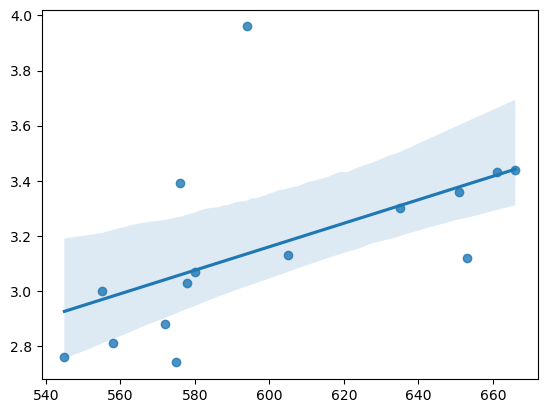

LinregressResult(slope=0.004267223518635641, intercept=0.5998612958803125, rvalue=0.5459189161795887, pvalue=0.035271615127326655, stderr=0.0018163754932013147, intercept_stderr=1.0927735237389298)


In [4]:
sns.regplot(x = LSAT, y = GPA, fit_reg = True)
plt.show()

print(linregress(LSAT, GPA))


In [5]:
B = 1000
Boot_corrs = np.empty(B)
for i in range(B):
    indices = np.random.randint(low=0, high=n, size=n)
    LSAT_B = np.take(LSAT, indices)
    GPA_B = np.take(GPA, indices)
    Boot_corrs[i] = np.corrcoef(LSAT_B, GPA_B)[0][1]

se = np.std(Boot_corrs)

corr = np.corrcoef(LSAT, GPA)[0][1]

print("correlation is estimated at {:.3f} with a standard error of {:.3f}".format(corr, se))

correlation is estimated at 0.546 with a standard error of 0.200


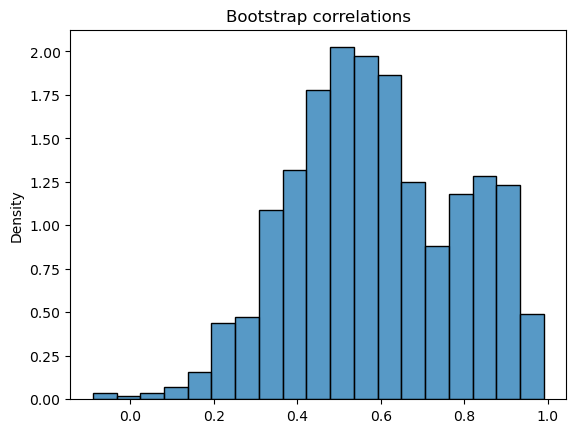

In [6]:
sns.histplot(Boot_corrs, stat = 'density')
plt.title("Bootstrap correlations")
plt.show()

Confidence intervals

In [7]:
Cnorm = (corr + norm.ppf(0.025) * se, corr + norm.ppf(0.975) * se)
print("normal confidence interval: ", Cnorm)

Cpivot = (2 * corr - np.quantile(Boot_corrs, 0.975), 2 * corr - np.quantile(Boot_corrs, 0.025))
print("pivot confidence interval: ", Cpivot)

Cpercentile = (np.quantile(Boot_corrs, 0.025), np.quantile(Boot_corrs, 0.975))
print("percentile confidence interval: ", Cpercentile)

normal confidence interval:  (0.1537886291643592, 0.938049203194818)
pivot confidence interval:  (0.1556142746987389, 0.8828561497254593)
percentile confidence interval:  (0.20898168263371797, 0.9362235576604384)


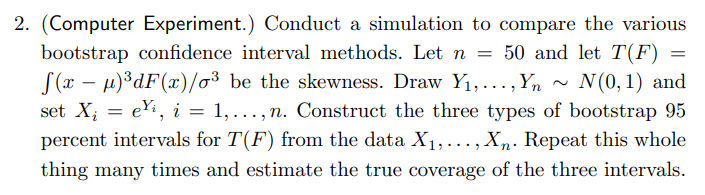

In [8]:
from scipy.stats import skew

n = 50

Y = np.random.randn(n)
X = np.exp(Y)

print(skew(X))

4.050486619176047


In [9]:
Xmean = X.mean()
Xsigma = X.std()

print(np.sum(((X-Xmean) ** 3)) / (n * Xsigma ** 3))

4.050486619176048


In [10]:
Xskew = skew(X)

B = 1000
Boot_skews = np.empty(B)
for i in range(B):
    Xboot = np.random.choice(X, size=n)
    Boot_skews[i] = skew(Xboot)

skewse = Boot_skews.std()

print("skew is estimated at {:.3f} with a standard error of {:.3f}".format(Xskew, skewse))

skew is estimated at 4.050 with a standard error of 1.092


In [11]:
Cnorm = (Xskew + norm.ppf(0.025) * skewse, Xskew + norm.ppf(0.975) * skewse)
print("normal confidence interval: ", Cnorm)

Cpivot = (2 * Xskew - np.quantile(Boot_skews, 0.975), 2 * Xskew - np.quantile(Boot_skews, 0.025))
print("pivot confidence interval: ", Cpivot)

Cpercentile = (np.quantile(Boot_skews, 0.025), np.quantile(Boot_skews, 0.975))
print("percentile confidence interval: ", Cpercentile)

normal confidence interval:  (1.9104667358853629, 6.19050650246673)
pivot confidence interval:  (2.9938196686489658, 6.839998345851669)
percentile confidence interval:  (1.2609748925004245, 5.107153569703128)


In [17]:


def skewBoot(n=50, B=1000, alpha = 0.05, N=1):
    Y = np.random.randn(n, N)
    X = np.exp(Y)
    theta = skew(X, axis = 0)

    def single(x):
        return np.random.choice(x, size=(len(x), B))

    def multiple(x):
        return np.vectorize(single, signature='(n)->(n,m)')(x)

    Xboot = multiple(X)
    Boot_skews = skew(Xboot, axis=0)
    skewse = Boot_skews.std(axis=1)

    Cnorm = (theta + norm.ppf(alpha/2) * skewse, theta + norm.ppf(1-alpha/2) * skewse)
    Cpivot = (2 * theta - np.quantile(Boot_skews, 1-alpha/2), 2 * theta - np.quantile(Boot_skews, alpha/2))
    Cpercentile = (np.quantile(Boot_skews, alpha/2), np.quantile(Boot_skews, 1-alpha/2))

    return theta, skewse, Cnorm, Cpivot, Cpercentile

def ininterval(x, C):
    l, u = C
    return np.logical_and((x > l), (x < u))

def maxinterval(C):
    l, u = C
    return (np.min(l), np.max(u))


    
    

In [13]:
skewBoot(N=2)

(array([2.72473229, 3.20631858]),
 array([0.79503818, 0.79944223]),
 (array([1.1664861 , 1.63944061]), array([4.28297848, 4.77319655])),
 (array([1.59308844, 2.55626101]), array([4.33801421, 5.30118678])),
 (1.1114503781630143, 3.8563761429543555))

In [18]:
N=1000
_, _, Cnorms, Cpivots, Cpercentiles = skewBoot(N=N)

theoryskew = 6.185

normprop = np.sum(ininterval(theoryskew, Cnorms))/N
pivotprop = np.sum(ininterval(theoryskew, Cpivots))/N
percentprop = np.sum(ininterval(theoryskew, Cpercentiles))/N

fullnorm = maxinterval(Cnorms)
fullpivot = maxinterval(Cpivots)
fullpercent = maxinterval(Cpercentiles)



We see that with n=50, the confidence interval rarely contains the theoretical value of the skew of ~6.185

In [19]:
print(normprop, pivotprop, percentprop)
print(fullnorm)
print(fullpivot)
print(fullpercent)

0.113 0.136 0.0
(-1.3384517353761751, 8.760847422592418)
(-3.948888523799563, 12.139781145723529)
(1.101635693067327, 5.392586404105074)


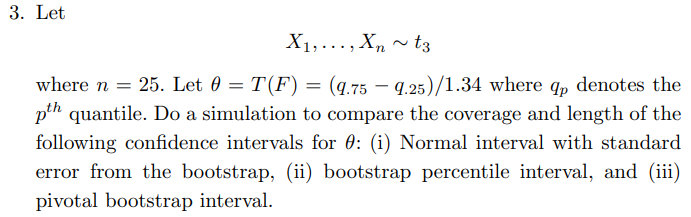

In [20]:
from scipy.stats import t

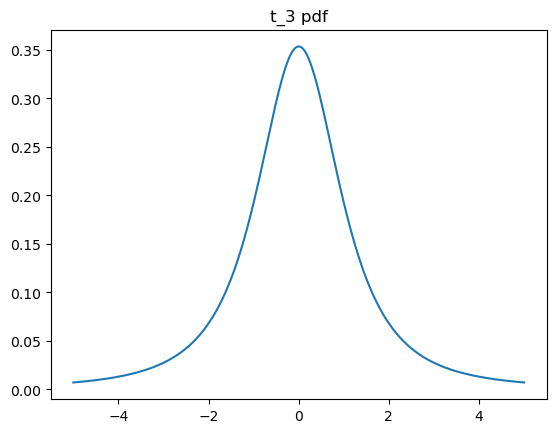

In [123]:
xs = np.linspace(-5, 5, 10000)
ys = t.pdf(xs, 2)

plt.plot(xs, ys)
#plt.yscale('log')
plt.title('t_3 pdf')
plt.show()

In [135]:
n = 25

X = t.rvs(df=3, size=n)
print(X)
thetahat = (np.quantile(X, 0.75) - np.quantile(X, 0.25)) / 1.34
print(thetahat)


[-0.30105186 -0.60285932 -1.31511619 -0.73404396 -0.67595543  1.18486371
  0.5547487  -3.94602694 -0.06475963 -0.0917065   1.38145482  0.29919135
 -0.29141693  2.3073931   0.98111253 -1.07574031 -0.21705059 -0.42266686
 -2.61816573 -1.27632054 -2.43852464 -0.77615862  0.47768668  0.22228138
 -0.5050351 ]
0.8024999789010344


In [136]:
B = 10000
Xboot = np.random.choice(X, size=(n, B))
thetaboot = (np.quantile(Xboot, 0.75, axis=0) - np.quantile(Xboot, 0.25, axis=0)) / 1.34
se = thetaboot.std()
print(se)

0.3141369868413726


In [137]:
alpha = 0.05
normint = norm_interval(thetahat=thetahat, se=se, alpha=alpha)
pivotint = pivot_interval(thetahat, thetaboot, alpha)
percint = percentile_interval(thetaboot, alpha)

print("normal interval = ", normint)
print("pivot interval = ", pivotint)
print("percentile interval = ", percint)

normal interval =  (0.18680279848001113, 1.4181971593220575)
pivot interval =  (-0.08201796534540251, 1.1877551540752307)
percentile interval =  (0.41724480372683814, 1.6870179231474713)


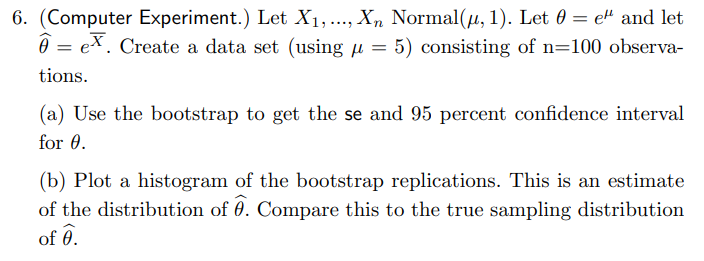

In [328]:
mu = 5
n=100
B=10000


X = norm.rvs(loc=mu, size=n)
Xbar = np.mean(X)
thetahat = np.exp(Xbar)

print(thetahat)

146.6150152205348


In [329]:
XBoot = np.random.choice(X, size=(n, B))
thetaboot = np.exp(np.mean(XBoot, axis=0))
se = thetaboot.std()
print(se)

14.119995970516081


In [330]:
alpha = 0.05
normC = norm_interval(thetahat, se, alpha)
pivotC = pivot_interval(thetahat, thetaboot, alpha)
percentC = percentile_interval(thetaboot, alpha)

print("normal interval = ", normC)
print("pivot interval = ", pivotC)
print("percentile interval = ", percentC)

normal interval =  (118.94033165647258, 174.289698784597)
pivot interval =  (116.71510902947969, 171.60743427911987)
percentile interval =  (121.6225961619497, 176.51492141158988)


In [331]:
from scipy.stats import lognorm

[]

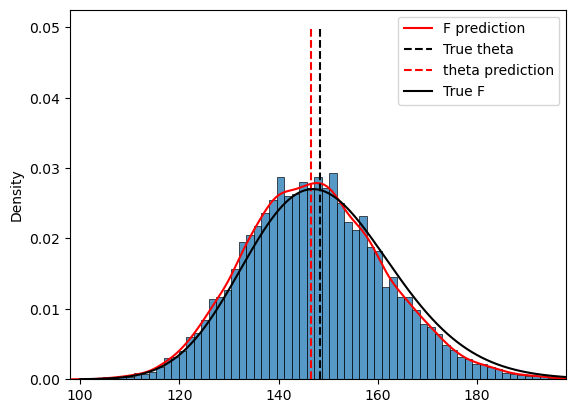

In [332]:

sns.histplot(thetaboot, stat = 'density', bins = 70)
sns.kdeplot(thetaboot, label = 'F prediction', color = 'red')
plt.vlines(np.exp(5),0, 0.05,linestyles= '--', color = 'k', label = 'True theta')
plt.vlines(thetahat,0, 0.05,linestyles= '--', color = 'red', label = 'theta prediction')
xtrue = np.linspace(100, 220, 10000)
ytrue = norm.pdf(np.log(xtrue), loc=mu, scale = np.sqrt(1/n)) / xtrue
#ytrue2 = norm.pdf(np.log(xtrue), loc=mu, scale = np.sqrt(1/n)) / xtrue
plt.plot(xtrue, ytrue, label = 'True F', color = 'k')
plt.legend()
plt.xlim([148-500/np.sqrt(n), 148+500/np.sqrt(n)])
plt.plot()

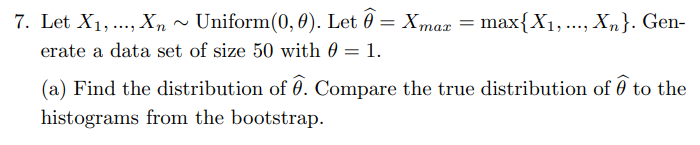
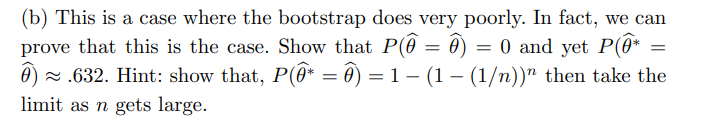

In [355]:
theta = 1
n = 50
X = np.random.uniform(low=0, high=theta, size=n)

In [356]:
thetahat = np.max(X)
print(thetahat)

0.9645249334507697


In [362]:
B=1000

Xboot = np.random.choice(X, size=(n, B))
thetaboot = np.max(Xboot, axis=0)

se=thetaboot.std()
print(se)

0.029580434993616244


In [364]:
from scipy.stats import uniform


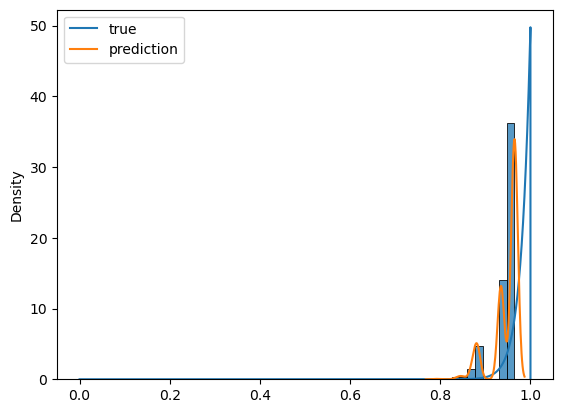

In [382]:
truex=np.linspace(0, theta, 10000)
truey = (n * (truex ** (n-1)) / (theta ** n)) * (truex < 1)
plt.plot(truex, truey, label = 'true')
sns.kdeplot(thetaboot, label = 'prediction')
sns.histplot(thetaboot, stat = 'density', bins = 10)
plt.legend()
plt.show()